<a href="https://colab.research.google.com/github/nguyenhieu-09/machine-learning/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_Baicuaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Following Libraries are being used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model #For missing values
from sklearn.preprocessing import StandardScaler #For scaling features

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor #Random Forest Regressor
from sklearn.ensemble import BaggingRegressor #Bagging Regressor
from sklearn.neighbors import KNeighborsRegressor #KNN Regressor
from sklearn.linear_model import LinearRegression #Linear Regressor

In [51]:
# Tải dữ liệu
df = pd.read_csv('/content/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [52]:
# Xem kích thước của tập dữ liệu
rows, col = df.shape
print ("Dimensions ơf dataset: {}" . format (df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions ơf dataset: (10841, 13)
Rows: 10841 
Columns: 13


In [53]:
# check the df structe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [54]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [55]:
# check giá trị unique của từng thuộc tính
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
Reviews
['159' '967' '87510' ... '603' '1195' '398307']
Size
['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4

In [56]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [57]:
# Giả sử df là DataFrame của bạn
# Lọc những dòng có giá trị rỗng trong cột "Review"
rows_with_empty_reviews = df[df['Rating'].isnull()]

# In ra các dòng có giá trị rỗng trong cột "Review"
print(rows_with_empty_reviews)

                                       App             Category  Rating  \
23                  Mcqueen Coloring pages       ART_AND_DESIGN     NaN   
113              Wrinkles and rejuvenation               BEAUTY     NaN   
123                 Manicure - nail design               BEAUTY     NaN   
126           Skin Care and Natural Beauty               BEAUTY     NaN   
129    Secrets of beauty, youth and health               BEAUTY     NaN   
...                                    ...                  ...     ...   
10824                            Cardio-FR              MEDICAL     NaN   
10825                   Naruto & Boruto FR               SOCIAL     NaN   
10831             payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN   
10835                             FR Forms             BUSINESS     NaN   
10838               Parkinson Exercices FR              MEDICAL     NaN   

      Reviews  Size  Installs  Type Price Content Rating  \
23         61  7.0M  100,000+  Free    

In [58]:
Outlinecampaign = df[df['Installs'] == "0+"]
Outlinecampaign

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0+,Paid,$1.49,Everyone,Personalization,11-Jul-18,1.1,4.2 and up
5307,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7M,0+,Paid,$13.99,Teen,Social,28-Jul-17,3.4.4.3.3,4.1 and up
5486,AP Series Solution Pro,FAMILY,NaN,0,7.4M,0+,Paid,$1.99,Everyone,Education,30-Jul-17,1.3,4.0 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33M,0+,Paid,$2.99,Everyone,Education,15-Apr-16,1,3.0 and up
6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4M,0+,Paid,$154.99,Everyone,Productivity,24-Nov-17,1.0.0,4.1 and up
7434,Pekalongan CJ,SOCIAL,NaN,0,5.9M,0+,Free,0,Teen,Social,21-Jul-18,0.0.1,4.4 and up
8081,CX Network,BUSINESS,NaN,0,10M,0+,Free,0,Everyone,Business,6-Aug-18,1.3.1,4.1 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1M,0+,Free,0,Everyone,News & Magazines,7-Jul-18,1.1,4.4 and up
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2M,0+,Free,0,Everyone,Art & Design,14-Mar-17,4,4.2 and up
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0,56M,0+,Paid,$3.99,Everyone,Travel & Local,22-Jan-17,1.1.1,4.1 and up


In [59]:
df.loc[(df['Rating'].isnull()) & (df['Installs'] == '0+'), 'Rating'] = 0

# Kiểm tra kết quả
print(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [60]:
Outline = df[df['Installs'] == "0+"]
Outline

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,0.0,0,5.5M,0+,Paid,$1.49,Everyone,Personalization,11-Jul-18,1.1,4.2 and up
5307,Ak Parti Yardım Toplama,SOCIAL,0.0,0,8.7M,0+,Paid,$13.99,Teen,Social,28-Jul-17,3.4.4.3.3,4.1 and up
5486,AP Series Solution Pro,FAMILY,0.0,0,7.4M,0+,Paid,$1.99,Everyone,Education,30-Jul-17,1.3,4.0 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,0.0,0,33M,0+,Paid,$2.99,Everyone,Education,15-Apr-16,1,3.0 and up
6692,cronometra-br,PRODUCTIVITY,0.0,0,5.4M,0+,Paid,$154.99,Everyone,Productivity,24-Nov-17,1.0.0,4.1 and up
7434,Pekalongan CJ,SOCIAL,0.0,0,5.9M,0+,Free,0,Teen,Social,21-Jul-18,0.0.1,4.4 and up
8081,CX Network,BUSINESS,0.0,0,10M,0+,Free,0,Everyone,Business,6-Aug-18,1.3.1,4.1 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,0.0,0,2.1M,0+,Free,0,Everyone,News & Magazines,7-Jul-18,1.1,4.4 and up
8871,Test Application DT 02,ART_AND_DESIGN,0.0,0,1.2M,0+,Free,0,Everyone,Art & Design,14-Mar-17,4,4.2 and up
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,0.0,0,56M,0+,Paid,$3.99,Everyone,Travel & Local,22-Jan-17,1.1.1,4.1 and up


In [61]:
# Chọn toàn bộ dữ liệu của các dòng có giá trị rỗng trong cột "Rating"
rows_with_empty = df[df['Rating'].isnull()]

# In ra toàn bộ dữ liệu của các dòng có giá trị rỗng trong cột "Rating"
rows_with_empty

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,7-Mar-18,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,20-Sep-17,8,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,23-Jul-18,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,17-Jul-18,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,8-Aug-17,2,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,31-Jul-18,2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,2-Feb-18,1,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,13-Jun-18,2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,29-Sep-16,1.1.5,4.0 and up


In [62]:
# dien gia tri trung binh cho tot ratting
mean_rating = df['Rating'].mean()
df['Rating'].fillna(mean_rating, inplace=True)

In [63]:
# Đếm số giá trị duy nhất trong mỗi cột và in ra

for column in df.columns:
    print(column,df[column].nunique())

App 9660
Category 34
Rating 42
Reviews 6002
Size 462
Installs 22
Type 3
Price 93
Content Rating 6
Genres 120
Last Updated 1378
Current Ver 2784
Android Ver 33


In [64]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64


In [65]:
df.Reviews.str.isnumeric().sum()

10840

In [66]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [67]:
df=df.drop(df.index[10472])

In [68]:
# Lấy giá trị unique của cột "review"
unique_reviews = df['Reviews'].unique()

# In ra các giá trị unique
print(unique_reviews)

['159' '967' '87510' ... '603' '1195' '398307']


In [69]:
df['Reviews'] = df['Reviews'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
# Xem kiểu dữ liệu mới
print(df['Reviews'].dtype)

int64


In [70]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [71]:
# Lấy giá trị unique của cột "Installs"
unique_installs = df['Installs'].unique()

# In ra các giá trị unique
print(unique_installs)

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']


In [72]:
# Xử lý cột "Installs"
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [73]:
# Xem kiểu dữ liệu mới
print(df['Installs'].dtype)

object


In [74]:
# Chuyển đổi kiểu dữ liệu của cột 'Installs' sang số
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
# Kiểm tra giá trị NaN sau khi chuyển đổi
nan_values = df['Installs'].isna().sum()
print(f"Số giá trị NaN sau khi chuyển đổi: {nan_values}")
# Xử lý NaN (ví dụ: điền giá trị trung bình)
df['Installs'].fillna(df['Installs'].mean(), inplace=True)
# Kiểm tra lại kiểu dữ liệu của cột 'Installs'
print(df['Installs'].dtype)

Số giá trị NaN sau khi chuyển đổi: 0
int64


In [75]:
# chia Installs thành 8 cột
# bins = [-1, 0, 50,'5000' ,'1000000','10000000','500000000','1000000000']
# labels = ['0', '1', '2', '3', '4','5','6']

bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, np.inf]
labels = ['0-100', '101-1000', '1001-10000', '10001-100000', '100001-1000000', '1000001-10000000', '10000001-100000000', '100000000+']
df['Installs-group'] = pd.cut(df['Installs'], bins=bins, labels=labels)

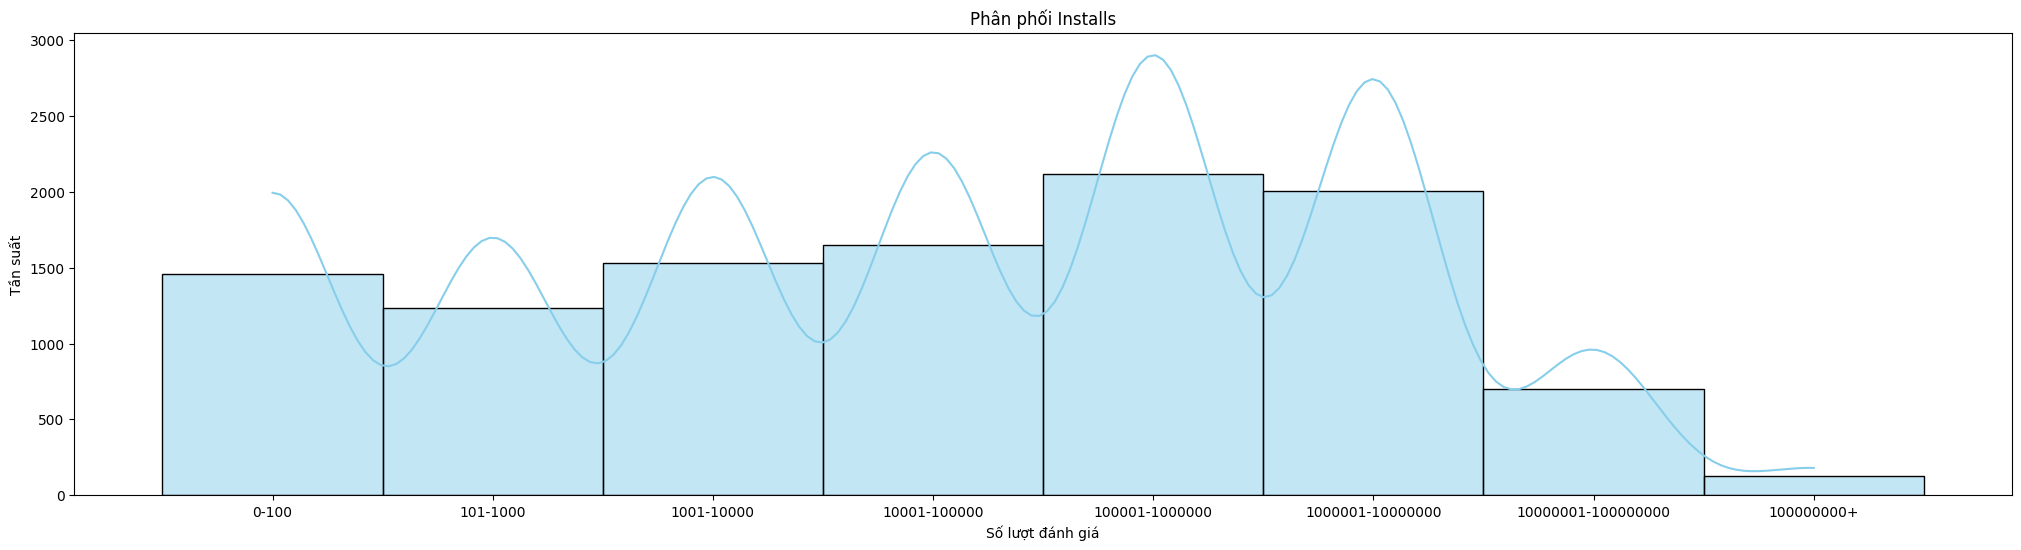

In [76]:
# Vẽ biểu đồ histogram cho cột 'Installs'
plt.figure(figsize=(25, 6))
sns.histplot(df['Installs-group'], bins=30, kde=True, color='skyblue')
plt.title('Phân phối Installs')
plt.xlabel('Số lượt đánh giá')
plt.ylabel('Tần suất')
plt.show()

In [77]:
# Lấy giá trị unique của cột "review"
unique_size = df['Size'].unique()

# In ra các giá trị unique
print(unique_size)

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M' '556k' '526k' '76M' '7.6M'

In [78]:
# Xử lý giá trị "Varies with device"
df['Size'] = np.where(df['Size'] == 'Varies with device', np.nan, df['Size'])

df.Size = (df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

# Hiển thị một số dòng đầu của dataframe sau khi thực hiện
print(df['Size'].head())

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64


In [79]:
df['Size'].describe()

count    9.145000e+03
mean     2.150101e+07
std      2.260330e+07
min      8.500000e+00
25%      4.900000e+06
50%      1.300000e+07
75%      3.000000e+07
max      1.000000e+08
Name: Size, dtype: float64

In [80]:
# Xác định và Xử lý các Giá trị Không Phải Số
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Kiểm tra giá trị NaN sau khi chuyển đổi
nan_values = df['Size'].isna().sum()
print(f"Số giá trị NaN sau khi chuyển đổi: {nan_values}")

# Xử lý NaN (ví dụ: điền giá trị trung bình)
df['Size'].fillna(df['Size'].mean(), inplace=True)

# Kiểm tra lại kiểu dữ liệu sau khi xử lý
print(df['Size'].dtype)

Số giá trị NaN sau khi chuyển đổi: 1695
float64


In [81]:
import pandas as pd

# Tạo bins và labels cho phân loại
bins = [-1, 5000000, 15000000, 30000000, float('inf')]
labels = ['0-5M', '5M-15M', '15M-30M', '>30m']

# Thực hiện phân loại
df['Size-Group'] = pd.cut(df['Size'], bins=bins, labels=labels, right=False)

# Hiển thị dữ liệu sau khi thêm cột mới
# print(df[['Size', 'Size-Group']])
# In ra số lượng các giá trị trong mỗi nhóm
print(df['Size-Group'].value_counts())

15M-30M    3706
5M-15M     2522
0-5M       2317
>30m       2295
Name: Size-Group, dtype: int64


In [82]:
# Lấy giá trị unique của cột "review"
unique_price = df['Price'].unique()

# In ra các giá trị unique
print(unique_price)

['0' '$4.99 ' '$3.99 ' '$6.99 ' '$1.49 ' '$2.99 ' '$7.99 ' '$5.99 '
 '$3.49 ' '$1.99 ' '$9.99 ' '$7.49 ' '$0.99 ' '$9.00 ' '$5.49 ' '$10.00 '
 '$24.99 ' '$11.99 ' '$79.99 ' '$16.99 ' '$14.99 ' '$1.00 ' '$29.99 '
 '$12.99 ' '$2.49 ' '$10.99 ' '$1.50 ' '$19.99 ' '$15.99 ' '$33.99 '
 '$74.99 ' '$39.99 ' '$3.95 ' '$4.49 ' '$1.70 ' '$8.99 ' '$2.00 ' '$3.88 '
 '$25.99 ' '$399.99 ' '$17.99 ' '$400.00 ' '$3.02 ' '$1.76 ' '$4.84 '
 '$4.77 ' '$1.61 ' '$2.50 ' '$1.59 ' '$6.49 ' '$1.29 ' '$5.00 ' '$13.99 '
 '$299.99 ' '$379.99 ' '$37.99 ' '$18.99 ' '$389.99 ' '$19.90 ' '$8.49 '
 '$1.75 ' '$14.00 ' '$4.85 ' '$46.99 ' '$109.99 ' '$154.99 ' '$3.08 '
 '$2.59 ' '$4.80 ' '$1.96 ' '$19.40 ' '$3.90 ' '$4.59 ' '$15.46 ' '$3.04 '
 '$4.29 ' '$2.60 ' '$3.28 ' '$4.60 ' '$28.99 ' '$2.95 ' '$2.90 ' '$1.97 '
 '$200.00 ' '$89.99 ' '$2.56 ' '$30.99 ' '$3.61 ' '$394.99 ' '$1.26 '
 '$1.20 ' '$1.04 ']


In [83]:
# Bước 1: Chuyển đổi thành số và xử lý giá trị 'Everyone'
df['Price'] = df['Price'].replace('Everyone', '0')  # Thay thế 'Everyone' bằng '0'
df['Price'] = df['Price'].apply(lambda x: float(x.replace('$', '')))  # Loại bỏ ký tự tiền và chuyển đổi thành số

# Kiểm tra lại kiểu dữ liệu sau khi xử lý
print(df['Price'].dtype)

float64


In [84]:
# Xác định và Xử lý các Giá trị Không Phải Số
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Kiểm tra giá trị NaN sau khi chuyển đổi
nan_values = df['Price'].isna().sum()
print(f"Số giá trị NaN sau khi chuyển đổi: {nan_values}")

# Xử lý NaN (ví dụ: điền giá trị trung bình)
df['Price'].fillna(df['Price'].mean(), inplace=True)

# Kiểm tra lại kiểu dữ liệu sau khi xử lý
print(df['Price'].dtype)

Số giá trị NaN sau khi chuyển đổi: 0
float64


In [85]:
# Tần suất của mỗi giá trị:
content_rating_counts = df['Content Rating'].value_counts()
print(content_rating_counts)

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64


In [86]:
print(df['Rating'].dtype)

float64


In [87]:
# Giả sử df là DataFrame của bạn và "Last Updated" là tên cột chứa ngày tháng
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Last Updated'] = pd.to_numeric(df['Last Updated'].dt.strftime('%d%m%Y'), errors='coerce')

# Xem kiểu dữ liệu mới
print(df['Last Updated'].dtype)

int64


In [88]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,10840.000000,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000,1.084000e+04
mean,4.185714,4.441529e+05,2.150101e+07,1.546434e+07,1.027368,1.567528e+07
std,0.502009,2.927761e+06,2.076086e+07,8.502936e+07,15.949703,9.559596e+06
min,0.000000,0.000000e+00,8.500000e+00,0.000000e+00,0.000000,1.012015e+06
25%,4.100000,3.800000e+01,5.900000e+06,1.000000e+03,0.000000,6.082018e+06
50%,4.200000,2.094000e+03,1.800000e+07,1.000000e+05,0.000000,1.607202e+07
75%,4.500000,5.477550e+04,2.600000e+07,5.000000e+06,0.000000,2.407202e+07
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000,3.112202e+07


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             10840 non-null  object  
 1   Category        10840 non-null  object  
 2   Rating          10840 non-null  float64 
 3   Reviews         10840 non-null  int64   
 4   Size            10840 non-null  float64 
 5   Installs        10840 non-null  int64   
 6   Type            10839 non-null  object  
 7   Price           10840 non-null  float64 
 8   Content Rating  10840 non-null  object  
 9   Genres          10840 non-null  object  
 10  Last Updated    10840 non-null  int64   
 11  Current Ver     10832 non-null  object  
 12  Android Ver     10838 non-null  object  
 13  Installs-group  10825 non-null  category
 14  Size-Group      10840 non-null  category
dtypes: category(2), float64(3), int64(3), object(7)
memory usage: 1.2+ MB


In [90]:
# bõ cột cũ
df= df.drop(['Android Ver','Current Ver','App','Genres','Size','Last Updated'],axis=1)

In [91]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.185714,4.441529e+05,1.546434e+07,1.027368
std,0.502009,2.927761e+06,8.502936e+07,15.949703
min,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Category        10840 non-null  object  
 1   Rating          10840 non-null  float64 
 2   Reviews         10840 non-null  int64   
 3   Installs        10840 non-null  int64   
 4   Type            10839 non-null  object  
 5   Price           10840 non-null  float64 
 6   Content Rating  10840 non-null  object  
 7   Installs-group  10825 non-null  category
 8   Size-Group      10840 non-null  category
dtypes: category(2), float64(2), int64(2), object(3)
memory usage: 699.2+ KB


In [93]:
from sklearn.preprocessing import LabelEncoder
#chuyển đổi loại dữ liệu cột thành loại dữ liệu chính xác của chúng là int
columns_to_encode = ['Content Rating','Installs-group','Size-Group','Category','Type']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Hiển thị 10 dòng đầu của DataFrame để kiểm tra
print(df.head())

   Category  Rating  Reviews  Installs  Type  Price  Content Rating  \
0         0     4.1      159     10000     0    0.0               1   
1         0     3.9      967    500000     0    0.0               1   
2         0     4.7    87510   5000000     0    0.0               1   
3         0     4.5   215644  50000000     0    0.0               4   
4         0     4.3      967    100000     0    0.0               1   

   Installs-group  Size-Group  
0               6           1  
1               4           2  
2               3           2  
3               2           1  
4               5           0  


In [94]:
# Lấy tên của cột 'Rating'
y_column = df['Rating']

# Loại bỏ cột 'Rating' khỏi DataFrame
df = df.drop('Rating', axis=1)

# Thêm cột 'Rating' vào cuối DataFrame
df['Rating'] = y_column
df.head()

,Category,Reviews,Installs,Type,Price,Content Rating,Installs-group,Size-Group,Rating
0,0,159,10000,0,0.0,1,6,1,4.1
1,0,967,500000,0,0.0,1,4,2,3.9
2,0,87510,5000000,0,0.0,1,3,2,4.7
3,0,215644,50000000,0,0.0,4,2,1,4.5
4,0,967,100000,0,0.0,1,5,0,4.3


In [95]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())

Category          0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Installs-group    0
Size-Group        0
Rating            0
dtype: int64


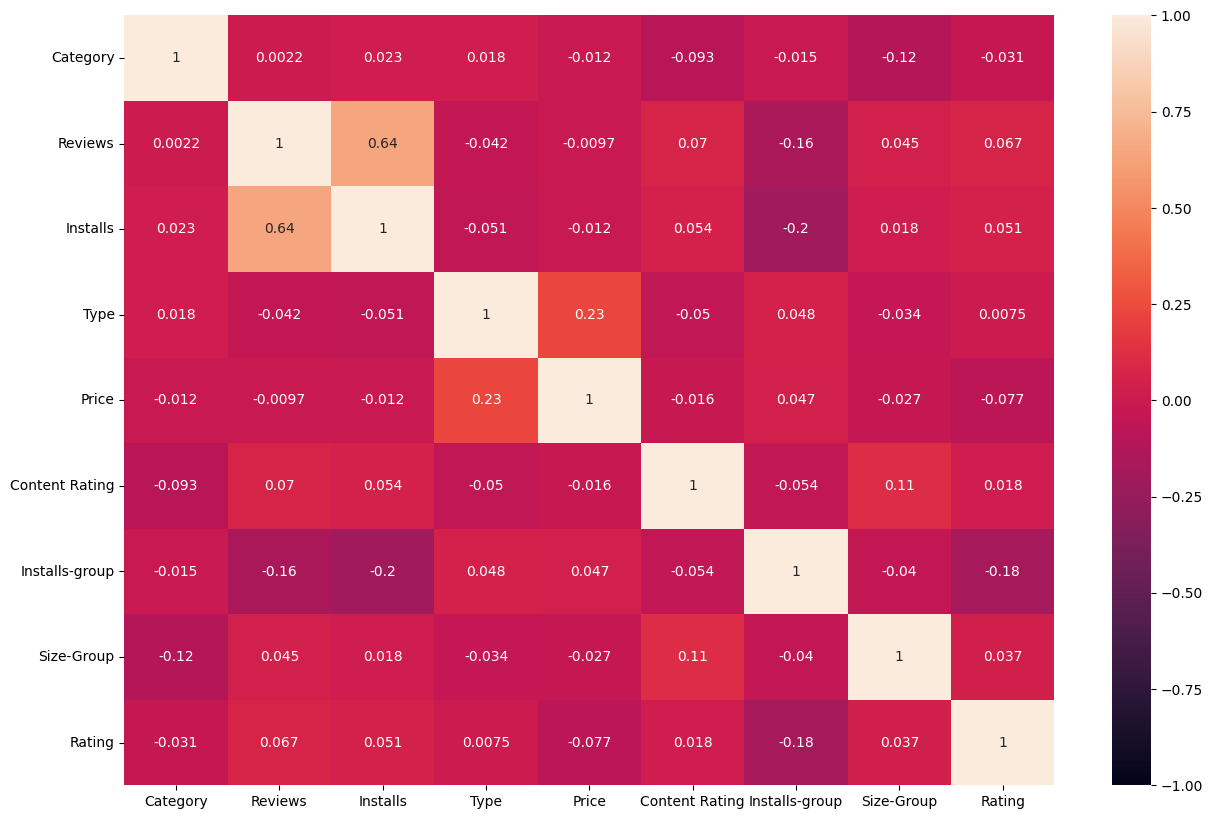

In [96]:
corr = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [97]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn import tree
# from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
Y = df['Rating']
X = df.drop('Rating', axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42)

In [98]:
# Define the regression tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
regression_tree2 = DecisionTreeRegressor(max_depth=6)
regression_tree2.fit(X_train, Y_train)
y_pred = regression_tree2.predict(X_test)
print(y_pred)
# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

[4.18765916 4.41622419 4.24553146 ... 4.23946208 4.30651727 4.41447124]
Mean Squared Error: 0.19362392177480545


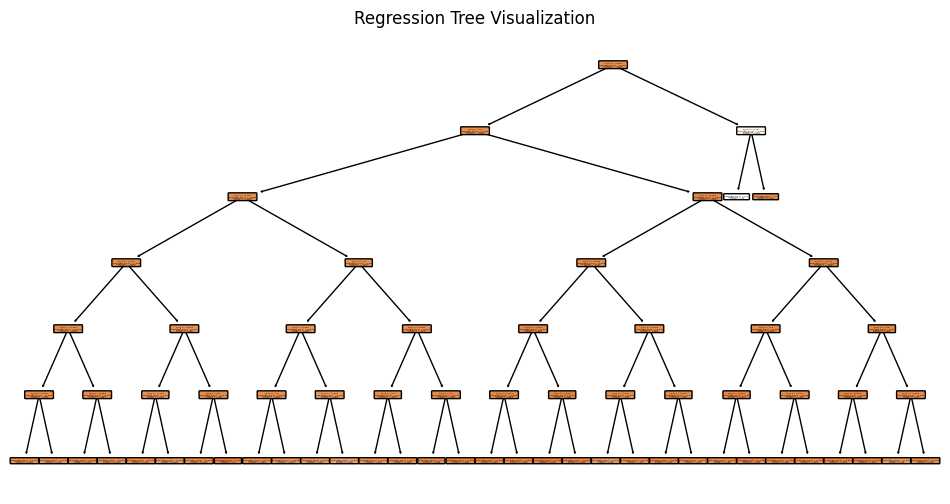

In [99]:
from sklearn.tree import plot_tree


# Visualize the regression tree
plt.figure(figsize=(12, 6))
plot_tree(regression_tree2, filled=True, rounded=True)
plt.title("Regression Tree Visualization")
plt.show()

In [100]:
from sklearn.model_selection import GridSearchCV
# Define our candidate hyperparameters
hp_candidates = {'max_depth': range(1,15)}

# Search for best hyperparameters
grid = GridSearchCV(estimator=DecisionTreeRegressor(),
                      param_grid=hp_candidates,
                      cv=5,
                      scoring='neg_mean_squared_error', )

# # Train the model with the best hyperparameter on the entire training set
# best_model = KNeighborsRegressor(n_neighbors=best_n_neighbors)
grid.fit(X_train, Y_train)
best_n_neighbors = grid.best_params_
print("Best max_depth:", best_n_neighbors)
y_predGN1 = grid.predict(X_test)
# Evaluate the model
mse = mean_squared_error(Y_test, y_predGN1)
print(f"Mean Squared Error for the best model: {mse}")

Best max_depth: {'max_depth': 6}
Mean Squared Error for the best model: 0.1936239217748054


In [101]:
# Tạo và Đào Tạo Mô Hình:
randomf = RandomForestRegressor(n_estimators=200)
randomf.fit(X_train, Y_train)

# In giá trị Bình phương Sai trung bình cho tập Huấn luyện
mse_train = mean_squared_error(Y_train, randomf.predict(X_train))
print('Bình phương Sai trung bình cho Tập Huấn luyện:', mse_train)

# In giá trị Bình phương Sai trung bình cho tập Kiểm tra
mse_random_forest = mean_squared_error(Y_test, randomf.predict(X_test))
print('Bình phương Sai trung bình cho Tập Kiểm tra:', mse_random_forest)
plt.show()

Bình phương Sai trung bình cho Tập Huấn luyện: 0.0755826972922455
Bình phương Sai trung bình cho Tập Kiểm tra: 0.20179610719626334


In [102]:
hp_candidates1 = {'n_estimators': [100, 200,300]}

# Search for best hyperparameters
grid1 = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=hp_candidates1,
                      cv=5,
                      scoring='neg_mean_squared_error', )

# # Train the model with the best hyperparameter on the entire training set
# best_model = KNeighborsRegressor(n_neighbors=best_n_neighbors)
grid1.fit(X_train, Y_train)
best_n_neighbors1 = grid1.best_estimator_
print("Best n_estimators:", best_n_neighbors1)
y_predGN1 = grid1.predict(X_test)
# Evaluate the model
mse = mean_squared_error(Y_test, y_predGN1)
print(f"Mean Squared Error for the best model: {mse}")

Best n_estimators: RandomForestRegressor(n_estimators=300)
Mean Squared Error for the best model: 0.20160800288505618


feature: Category = 0.19350946626949247
feature: Reviews = 0.396393430140147
feature: Installs = 0.07755760744565994
feature: Type = 0.013983034362886344
feature: Price = 0.03275574972381829
feature: Content Rating = 0.04026030539200654
feature: Installs-group = 0.13671959791413005
feature: Size-Group = 0.10882080875185954


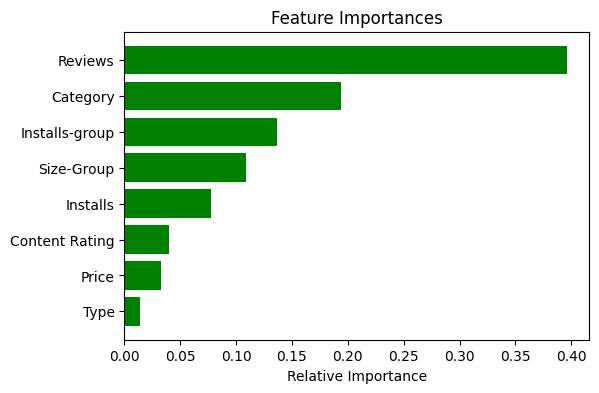

In [103]:
# In ra độ quan trọng của các đặc trưng:
for name, importance in zip(df.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)

importances = randomf.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.figure(figsize=(6, 4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()